# Naive Bayes — Bernoulli
# Resample — SMOTE
### Import Libraries

conda install -c glemaitre imbalanced-learn 


conda update scikit-learn

In [12]:
from sklearn import __version__ 
print('The scikit-learn version is {}.'.format(__version__))

The scikit-learn version is 0.19.1.


In [13]:
import pandas as pd, numpy as np #basic package

from scipy import stats
from sklearn import preprocessing

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GMM

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, log_loss, confusion_matrix

from sklearn.utils import resample # resample

from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt


## Import Data and Define Global Variables

In [14]:
df = pd.read_csv("df1_diag_as_single_column.csv", index_col = 0)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
df.head()

,diag_1,diag_2,diag_3,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,...,Yes,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_tran
0,250.0,434.952844,409.650469,0,0,1,0,0,1,0,...,0,-1.137746,-0.105230,-0.786854,-1.850615,-0.292413,-0.214198,-0.505835,-3.343200,0
1,276.0,250.000000,255.000000,0,0,1,0,0,1,0,...,1,-0.468172,0.808668,-0.786854,0.243035,-0.292413,-0.214198,-0.505835,0.810349,0
2,648.0,250.000000,27.000000,1,0,0,0,0,1,0,...,1,-0.802959,-1.628393,2.147906,-0.372744,1.274004,-0.214198,0.280721,-0.747232,0
3,8.0,250.000000,403.000000,0,0,1,0,0,0,1,...,1,-0.802959,0.047087,-0.199902,-0.003277,-0.292413,-0.214198,-0.505835,-0.228039,0
4,197.0,157.000000,250.000000,0,0,1,0,0,0,1,...,1,-1.137746,0.402491,-0.786854,-0.988524,-0.292413,-0.214198,-0.505835,-1.266426,0


In [16]:
len(df.columns)

221

In [17]:
df.head()

,diag_1,diag_2,diag_3,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,...,Yes,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_tran
0,250.0,434.952844,409.650469,0,0,1,0,0,1,0,...,0,-1.137746,-0.105230,-0.786854,-1.850615,-0.292413,-0.214198,-0.505835,-3.343200,0
1,276.0,250.000000,255.000000,0,0,1,0,0,1,0,...,1,-0.468172,0.808668,-0.786854,0.243035,-0.292413,-0.214198,-0.505835,0.810349,0
2,648.0,250.000000,27.000000,1,0,0,0,0,1,0,...,1,-0.802959,-1.628393,2.147906,-0.372744,1.274004,-0.214198,0.280721,-0.747232,0
3,8.0,250.000000,403.000000,0,0,1,0,0,0,1,...,1,-0.802959,0.047087,-0.199902,-0.003277,-0.292413,-0.214198,-0.505835,-0.228039,0
4,197.0,157.000000,250.000000,0,0,1,0,0,0,1,...,1,-1.137746,0.402491,-0.786854,-0.988524,-0.292413,-0.214198,-0.505835,-1.266426,0


# Resample

In [18]:
pd.Series(y).value_counts()

0    88324
1    11169
Name: readmitted_tran, dtype: int64

# SMOTE

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [20]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [21]:
pd.Series(y_train).value_counts()

1    61722
0    61722
dtype: int64

In [22]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X_train)

plt.scatter(X.iloc[:,0], X.iloc[:, 1], s = 1)

centers = np.empty(shape=(gmm.n_components, X.shape[1]))

# Centroids

In [23]:
Centroids = pd.DataFrame(centers)

In [24]:
Centroids.columns = X.columns

In [29]:
Centroids

,diag_1,diag_2,diag_3,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,...,No.12,Yes,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,427.497820,428.000000,414.000000,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,...,0.49782,0.50218,-0.802959,0.150180,-0.492099,-0.802985,-0.292413,-0.214198,-0.110842,0.810349
1,425.235015,513.617508,594.161277,0.0,0.0,1.0,0.0,0.0,0.654377,0.345623,...,0.00000,1.00000,0.560874,0.398747,-0.178262,0.991052,0.248977,0.153496,0.309721,0.810349


### Save centroids to csv

Centroids.to_csv("Centroids_GMM_df1.csv")

In [26]:
for i in range(gmm.n_components):
    density = stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i],  allow_singular=True).logpdf(X_train)
    centers[i, :] = X_train[np.argmax(density)]

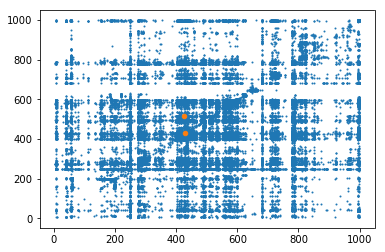

In [27]:
plt.scatter(centers[:, 0], centers[:, 1], s=20)
plt.show()